# Activity Recognition system based on Multisensor data fusion (AReM) Data Set

### https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29#

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

## Data preparation: Reading and appending data for each activity

###  Bending 1 >> Number assigned= 0

In [2]:
cd bending1

C:\Users\nkeya\in_ML_class\activity_recognition\bending1


In [3]:
# ls

In [4]:
bend1_list=[]

In [5]:
for i in range(1,8):
    bd1=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    bend1_list.append(bd1)

In [6]:
bend1=bend1_list[0]

In [7]:
bend1=bend1.append(bend1_list[1:],ignore_index=True)

In [8]:
bending1=bend1

In [9]:
bending1["activity"]="Bending1"

In [10]:
bending1["activity_num"]=0

In [11]:
bending1

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity,activity_num
0,0,39.25,0.43,22.75,0.43,33.75,1.30,Bending1,0
1,250,39.25,0.43,23.00,0.00,33.00,0.00,Bending1,0
2,500,39.25,0.43,23.25,0.43,33.00,0.00,Bending1,0
3,750,39.50,0.50,23.00,0.71,33.00,0.00,Bending1,0
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,Bending1,0
...,...,...,...,...,...,...,...,...,...
3355,118750,44.25,0.83,16.25,1.30,24.00,0.00,Bending1,0
3356,119000,44.00,0.71,11.00,1.00,24.00,0.00,Bending1,0
3357,119250,44.25,0.43,10.25,1.30,22.75,0.83,Bending1,0
3358,119500,43.75,0.43,7.33,2.87,21.50,0.50,Bending1,0


### Bending2  Number assigned >> 1

In [12]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [13]:
cd bending2

C:\Users\nkeya\in_ML_class\activity_recognition\bending2


In [14]:
# ls

In [15]:
bend2_list=[]

In [16]:
for i in range(1,7):
    if i==4:
        continue
    bd2=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    bend2_list.append(bd2)

In [17]:
len(bend2_list)

5

In [18]:
bd4=pd.read_csv('dataset4.csv',skiprows=5,delimiter=" ",header=None)

In [19]:
bd4.columns=['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','77']

In [20]:
bd4=bd4.drop(['77'],axis=1)

In [21]:
bd4

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,32.50,0.50,0.00,0.00,19.00,1.00
1,250,32.50,0.50,0.00,0.00,18.50,0.50
2,500,32.75,0.43,1.00,0.00,18.00,0.00
3,750,32.50,0.50,0.00,0.00,17.50,0.50
4,1000,32.50,0.50,7.50,0.50,17.50,0.87
...,...,...,...,...,...,...,...
475,118750,28.67,0.47,4.67,1.25,17.33,0.47
476,119000,27.50,0.50,5.50,2.50,17.25,1.30
477,119250,28.00,0.00,6.67,0.94,17.00,1.00
478,119500,28.00,0.00,5.00,0.82,17.00,0.71


In [22]:
bend2=bd4

In [23]:
bend2=bend2.append(bend2_list[0:],ignore_index=True)

In [24]:
bending2=bend2

In [25]:
bending2["activity"]="Bending2"

In [26]:
bending2["activity_num"]=1

In [27]:
bending2

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity,activity_num
0,0,32.50,0.50,0.00,0.00,19.0,1.00,Bending2,1
1,250,32.50,0.50,0.00,0.00,18.5,0.50,Bending2,1
2,500,32.75,0.43,1.00,0.00,18.0,0.00,Bending2,1
3,750,32.50,0.50,0.00,0.00,17.5,0.50,Bending2,1
4,1000,32.50,0.50,7.50,0.50,17.5,0.87,Bending2,1
...,...,...,...,...,...,...,...,...,...
2875,118750,27.00,0.00,14.00,0.00,6.5,0.50,Bending2,1
2876,119000,27.00,0.00,15.00,0.00,4.0,1.00,Bending2,1
2877,119250,27.00,0.00,14.25,0.83,4.0,2.00,Bending2,1
2878,119500,27.00,0.00,13.33,1.25,1.5,0.50,Bending2,1


### Cycling, number assigned=2

In [28]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [29]:
cd cycling

C:\Users\nkeya\in_ML_class\activity_recognition\cycling


In [30]:
# ls

In [31]:
cycle_list=[]

In [32]:
for i in range(1,16):
    cyl=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    cycle_list.append(cyl)

In [33]:
cycle=cycle_list[0]

In [34]:
cycle=cycle.append(cycle_list[1:],ignore_index=True)

In [35]:
cycling=cycle

In [36]:
cycling["activity"]="Cycling"

In [37]:
cycling["activity_num"]=2

In [38]:
cycling

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity,activity_num
0,0,32.00,4.85,17.50,3.35,22.50,3.20,Cycling,2
1,250,40.50,1.12,14.00,2.24,21.75,1.30,Cycling,2
2,500,40.50,2.60,11.33,4.50,18.25,5.31,Cycling,2
3,750,34.50,1.50,20.67,2.87,19.00,2.83,Cycling,2
4,1000,34.50,1.50,21.25,3.27,18.25,4.38,Cycling,2
...,...,...,...,...,...,...,...,...,...
7195,118750,38.00,2.55,18.25,2.17,20.00,4.74,Cycling,2
7196,119000,36.00,0.00,19.00,1.41,13.67,1.25,Cycling,2
7197,119250,37.00,1.73,17.75,0.43,22.50,0.87,Cycling,2
7198,119500,37.00,3.74,19.00,4.18,22.00,1.41,Cycling,2


### Lying, number assigned=3

In [39]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [40]:
cd lying

C:\Users\nkeya\in_ML_class\activity_recognition\lying


In [41]:
# ls

In [42]:
lye_list=[]

In [43]:
for i in range(1,16):
    lii=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    lye_list.append(lii)

In [44]:
lyee=lye_list[0]

In [45]:
lyee=lyee.append(lye_list[1:],ignore_index=True)

In [46]:
lyings=lyee

In [47]:
lyings["activity"]="Lying"

In [48]:
lyings["activity_num"]=3

In [49]:
lyings

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity,activity_num
0,0,29.00,0.00,9.00,0.71,8.50,0.50,Lying,3
1,250,29.00,0.00,8.00,0.71,8.50,0.50,Lying,3
2,500,29.00,0.00,8.00,0.71,8.00,1.00,Lying,3
3,750,28.50,0.50,8.25,0.43,8.75,0.43,Lying,3
4,1000,29.00,0.00,8.75,1.09,9.00,0.00,Lying,3
...,...,...,...,...,...,...,...,...,...
7195,118750,29.25,0.43,4.00,0.00,10.50,0.50,Lying,3
7196,119000,29.25,0.43,4.00,0.00,10.25,0.83,Lying,3
7197,119250,29.50,0.50,2.33,0.94,9.67,0.94,Lying,3
7198,119500,29.00,0.00,2.67,0.47,10.00,0.82,Lying,3


### Sitting , number assigned=4

In [50]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [51]:
cd sitting

C:\Users\nkeya\in_ML_class\activity_recognition\sitting


In [52]:
# ls

In [53]:
sit_list=[]

In [54]:
for i in range(1,16):
    si=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    sit_list.append(si)

In [55]:
sitt=sit_list[0]

In [56]:
sitt=sitt.append(sit_list[1:],ignore_index=True)

In [57]:
sitting=sitt

In [58]:
sitting["activity"]="Sitting"

In [59]:
sitting["activity_num"]=4

In [60]:
sitting

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity,activity_num
0,0,42.00,0.00,19.20,0.98,15.50,2.06,Sitting,4
1,250,42.00,0.00,19.33,0.94,11.00,0.82,Sitting,4
2,500,42.00,0.00,17.50,0.50,12.50,0.50,Sitting,4
3,750,42.00,0.00,17.00,1.41,13.33,0.94,Sitting,4
4,1000,42.00,0.00,17.50,0.87,12.00,0.82,Sitting,4
...,...,...,...,...,...,...,...,...,...
7194,118750,41.00,0.82,17.25,1.30,11.00,0.82,Sitting,4
7195,119000,41.50,0.50,18.00,0.00,10.67,1.25,Sitting,4
7196,119250,41.33,0.47,18.67,0.47,11.00,1.41,Sitting,4
7197,119500,41.50,0.50,18.50,0.50,12.33,0.47,Sitting,4


### Standing number assigned=5

In [61]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [62]:
cd standing

C:\Users\nkeya\in_ML_class\activity_recognition\standing


In [63]:
stand_list=[]

In [64]:
# ls

In [65]:
for i in range(1,16):
    std=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    stand_list.append(std)

In [66]:
stand=stand_list[0]

In [67]:
stand=stand.append(stand_list[1:],ignore_index=True)

In [68]:
standing=stand

In [69]:
standing["activity"]="standing"

In [70]:
standing["activity_num"]=5

In [71]:
standing

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity,activity_num
0,0,46.50,0.50,11.50,0.50,20.33,0.94,standing,5
1,250,46.50,0.50,12.00,0.00,20.25,0.43,standing,5
2,500,46.50,0.50,12.00,0.00,20.50,0.50,standing,5
3,750,46.50,0.50,12.75,0.43,19.50,0.50,standing,5
4,1000,46.50,0.50,13.25,0.43,18.75,0.43,standing,5
...,...,...,...,...,...,...,...,...,...
7195,118750,45.25,0.43,12.25,0.43,13.75,0.83,standing,5
7196,119000,45.00,0.00,12.60,0.80,14.25,0.83,standing,5
7197,119250,45.00,0.00,12.00,0.00,14.50,0.50,standing,5
7198,119500,45.50,0.50,12.25,0.43,14.50,0.50,standing,5


### Walking number assigned=6

In [72]:
cd ..

C:\Users\nkeya\in_ML_class\activity_recognition


In [73]:
cd walking

C:\Users\nkeya\in_ML_class\activity_recognition\walking


In [74]:
# ls

In [75]:
walk_list=[]

In [76]:
for i in range(1,16):
    wal=pd.read_csv(f'dataset{i}.csv',skiprows=4)
    walk_list.append(wal)

In [77]:
walk=walk_list[0]

In [78]:
walk=walk.append(walk_list[1:],ignore_index=True)

In [79]:
walking=walk

In [80]:
walking["activity"]="Walking"

In [81]:
walking["activity_num"]=6

In [82]:
walking

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity,activity_num
0,0,35.00,3.67,16.50,3.77,14.00,1.63,Walking,6
1,250,28.50,3.35,17.50,3.77,12.25,3.90,Walking,6
2,500,35.50,2.87,15.75,2.86,17.75,5.07,Walking,6
3,750,29.75,12.19,16.25,2.17,20.75,2.59,Walking,6
4,1000,27.00,2.12,16.75,0.83,24.75,1.64,Walking,6
...,...,...,...,...,...,...,...,...,...
7195,118750,34.50,6.18,9.00,3.56,12.67,4.19,Walking,6
7196,119000,25.75,6.02,13.75,2.05,16.00,1.58,Walking,6
7197,119250,31.50,3.35,10.25,5.12,16.25,2.95,Walking,6
7198,119500,33.75,2.77,14.00,3.24,13.75,0.43,Walking,6


## Appending all the data for activities together

In [83]:
final_data=bending1

In [84]:
append_list=[bending2,cycling,lyings,sitting,standing,walking]

In [85]:
final_data=final_data.append(append_list,ignore_index=True)

In [86]:
final_data

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity,activity_num
0,0,39.25,0.43,22.75,0.43,33.75,1.30,Bending1,0
1,250,39.25,0.43,23.00,0.00,33.00,0.00,Bending1,0
2,500,39.25,0.43,23.25,0.43,33.00,0.00,Bending1,0
3,750,39.50,0.50,23.00,0.71,33.00,0.00,Bending1,0
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,Bending1,0
...,...,...,...,...,...,...,...,...,...
42234,118750,34.50,6.18,9.00,3.56,12.67,4.19,Walking,6
42235,119000,25.75,6.02,13.75,2.05,16.00,1.58,Walking,6
42236,119250,31.50,3.35,10.25,5.12,16.25,2.95,Walking,6
42237,119500,33.75,2.77,14.00,3.24,13.75,0.43,Walking,6


## EDA

In [87]:
final_data.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'activity', 'activity_num'],
      dtype='object')

In [88]:
final_data.rename(columns={'# Columns: time':'Time_series'},inplace=True)

In [89]:
f_edit=final_data.drop(['Time_series'],axis=1)

In [90]:
f_edit.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity_num
count,42239.000000,42239.000000,42239.000000,42239.000000,42239.000000,42239.000000,42239.000000
mean,38.917264,1.459145,14.278160,1.502241,16.035170,1.620705,3.477260
std,6.337280,2.047973,5.435483,1.639519,6.736022,1.637070,1.821487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.400000,11.330000,0.430000,12.000000,0.470000,2.000000
50%,39.750000,0.500000,15.000000,0.830000,16.000000,1.000000,4.000000
75%,43.750000,1.790000,18.000000,2.290000,19.250000,2.290000,5.000000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000,6.000000


In [208]:
f_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42239 entries, 0 to 42238
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   avg_rss12     42239 non-null  float64
 1   var_rss12     42239 non-null  float64
 2   avg_rss13     42239 non-null  float64
 3   var_rss13     42239 non-null  float64
 4   avg_rss23     42239 non-null  float64
 5   var_rss23     42239 non-null  float64
 6   activity      42239 non-null  object 
 7   activity_num  42239 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.6+ MB


In [209]:
f_edit.nunique()

avg_rss12       354
var_rss12       689
avg_rss13       304
var_rss13       488
avg_rss23       363
var_rss23       522
activity          7
activity_num      7
dtype: int64

In [213]:
f_edit=f_edit.drop(['activity'],axis=1)

In [214]:
f_edit.corr()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity_num
avg_rss12,1.000000,-0.385820,-0.033068,-0.289924,-0.004078,-0.286003,0.055850
var_rss12,-0.385820,1.000000,0.150672,0.545511,0.045885,0.540874,0.294412
avg_rss13,-0.033068,0.150672,1.000000,0.049531,0.443869,0.177921,-0.083737
var_rss13,-0.289924,0.545511,0.049531,1.000000,0.078696,0.531174,0.153174
avg_rss23,-0.004078,0.045885,0.443869,0.078696,1.000000,-0.055182,-0.388693
var_rss23,-0.286003,0.540874,0.177921,0.531174,-0.055182,1.000000,0.207265
activity_num,0.055850,0.294412,-0.083737,0.153174,-0.388693,0.207265,1.000000


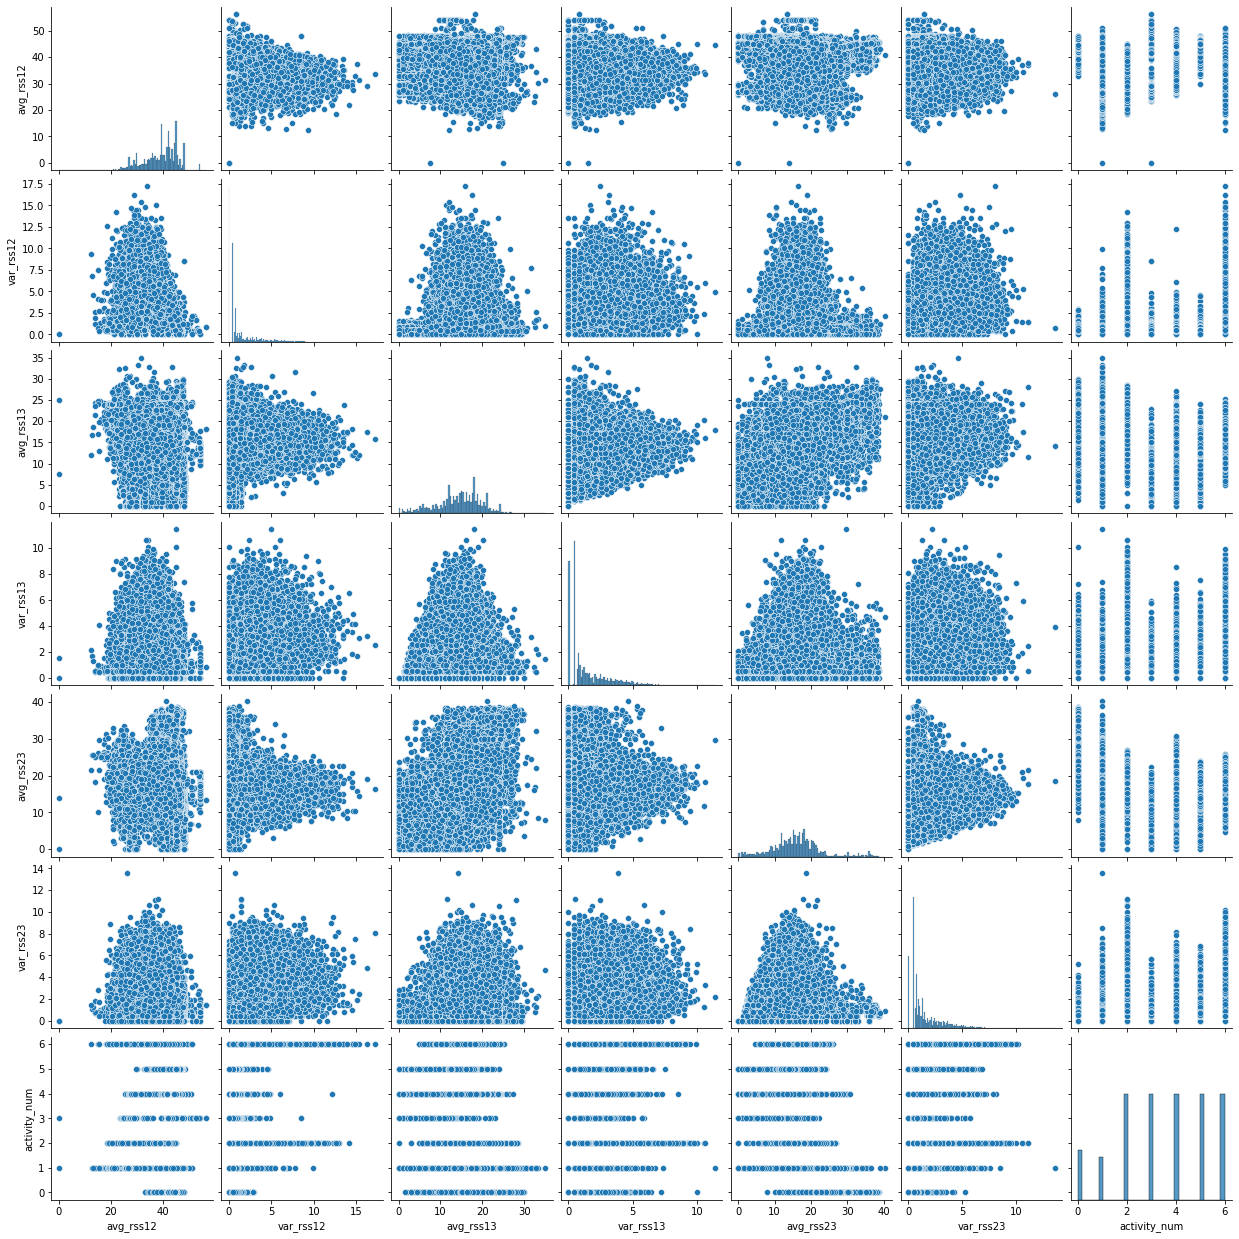

In [230]:
sns.pairplot(data=f_edit)

In [232]:
f_edit.columns

Index(['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'activity_num'],
      dtype='object')

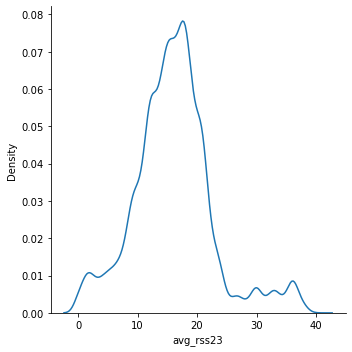

In [242]:
sns.displot(f_edit['avg_rss23'],kind="kde")

In [91]:
# ProfileReport(f_edit)

<AxesSubplot:>

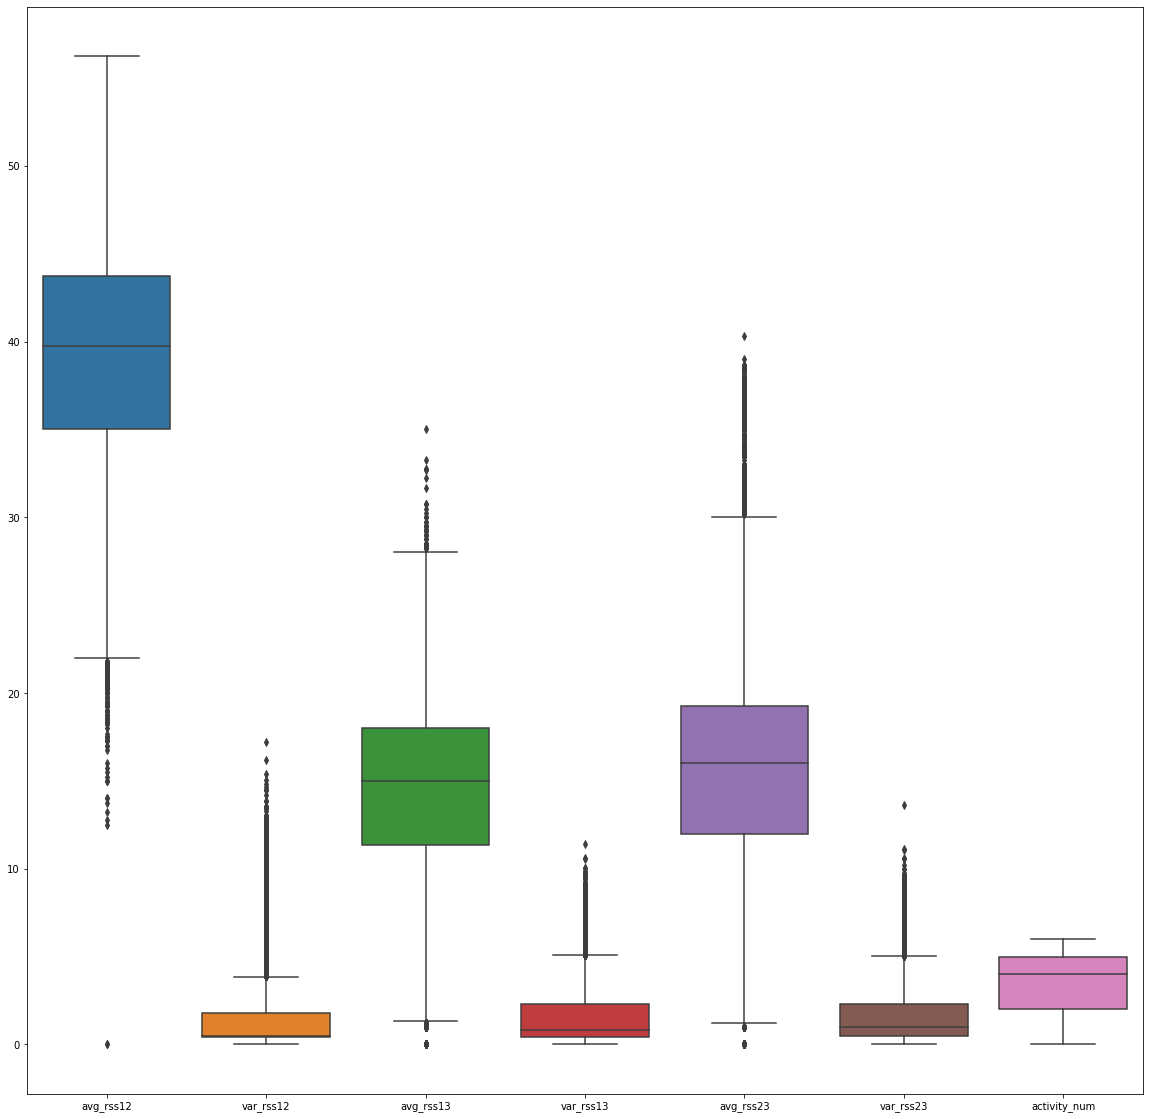

In [243]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=f_edit,ax=ax)

## Data Preprocessing

### Removing outliers

In [244]:
f_edit.columns

Index(['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'activity_num'],
      dtype='object')

In [245]:
q=f_edit['avg_rss23'].quantile(0.95)
f1_edit=f_edit[f_edit['avg_rss23']<q]

In [246]:
q=f_edit['avg_rss12'].quantile(0.01)
f1_edit=f1_edit[f1_edit['avg_rss12']>q]

In [96]:
# q=f_edit['var_rss12'].quantile(0.95)
# f1_edit=f1_edit[f1_edit['var_rss12']<q]

In [247]:
f1_edit

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity_num
406,42.75,1.30,23.75,1.48,29.75,0.43,0
407,42.00,0.00,21.67,0.47,29.67,0.47,0
409,42.00,0.00,24.00,0.00,29.75,0.43,0
410,42.00,0.00,22.50,0.50,29.75,0.43,0
412,42.00,0.00,22.50,1.12,29.75,0.43,0
...,...,...,...,...,...,...,...
42234,34.50,6.18,9.00,3.56,12.67,4.19,6
42235,25.75,6.02,13.75,2.05,16.00,1.58,6
42236,31.50,3.35,10.25,5.12,16.25,2.95,6
42237,33.75,2.77,14.00,3.24,13.75,0.43,6


<AxesSubplot:>

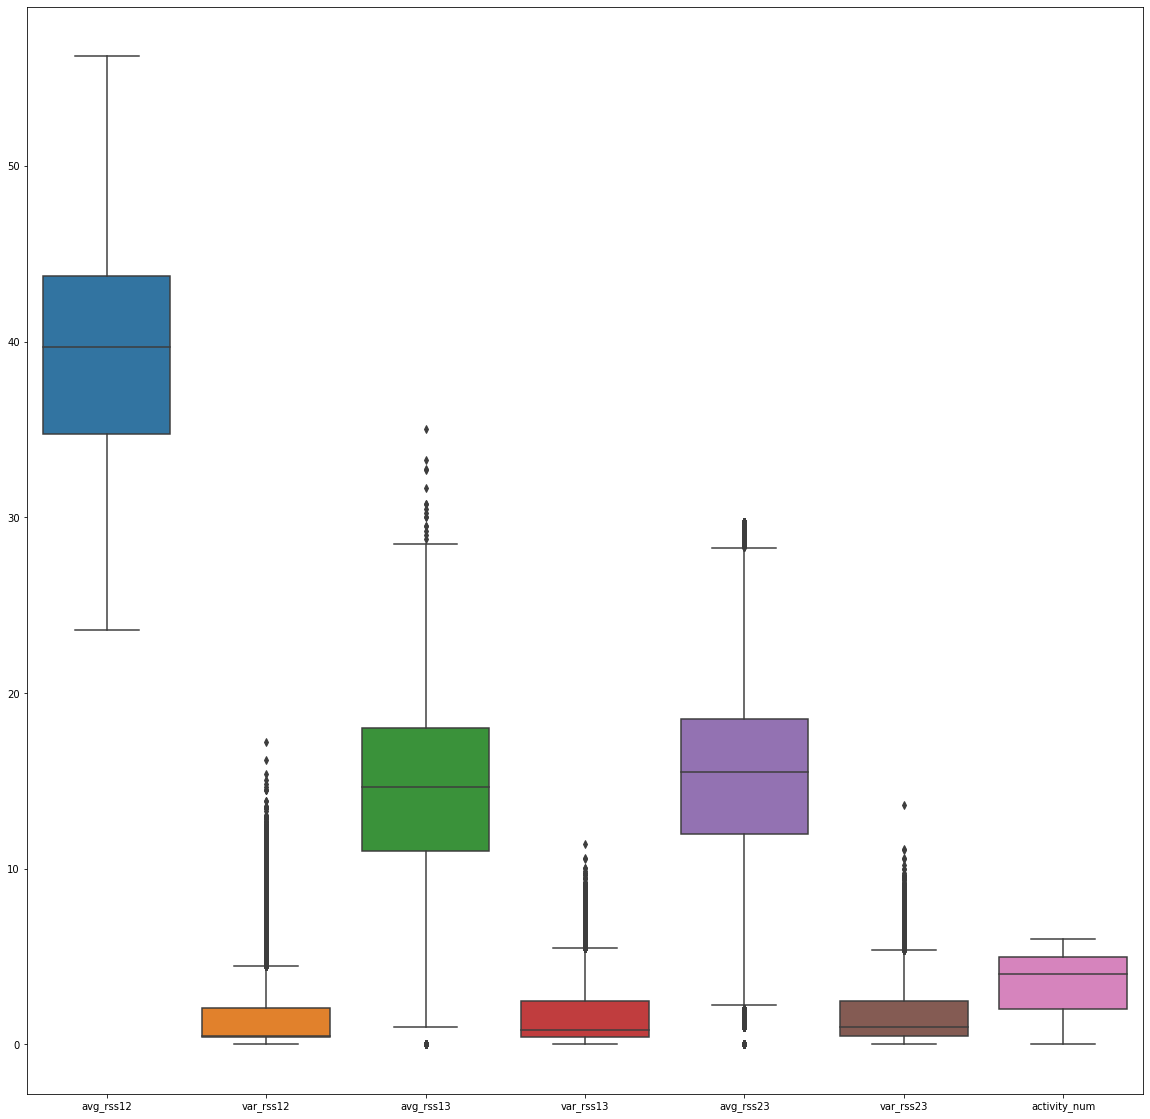

In [248]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=f1_edit,ax=ax)

In [99]:
# ProfileReport(f1_edit)

In [250]:
x=f1_edit.drop(["activity_num"],axis=1)

In [251]:
y=f1_edit['activity_num']

In [252]:
x

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
406,42.75,1.30,23.75,1.48,29.75,0.43
407,42.00,0.00,21.67,0.47,29.67,0.47
409,42.00,0.00,24.00,0.00,29.75,0.43
410,42.00,0.00,22.50,0.50,29.75,0.43
412,42.00,0.00,22.50,1.12,29.75,0.43
...,...,...,...,...,...,...
42234,34.50,6.18,9.00,3.56,12.67,4.19
42235,25.75,6.02,13.75,2.05,16.00,1.58
42236,31.50,3.35,10.25,5.12,16.25,2.95
42237,33.75,2.77,14.00,3.24,13.75,0.43


In [253]:
y

406      0
407      0
409      0
410      0
412      0
        ..
42234    6
42235    6
42236    6
42237    6
42238    6
Name: activity_num, Length: 39597, dtype: int64

In [254]:
scaler=StandardScaler()

In [255]:
x_scaled=scaler.fit_transform(x)

In [256]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.2,random_state=42)

### checking vif 

In [105]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [106]:
vif_score(x)

,FEATURE,VIF_SCORE
0,avg_rss12,1.202452
1,var_rss12,1.747673
2,avg_rss13,1.251060
3,var_rss13,1.680107
4,avg_rss23,1.219331
5,var_rss23,1.686591


<AxesSubplot:>

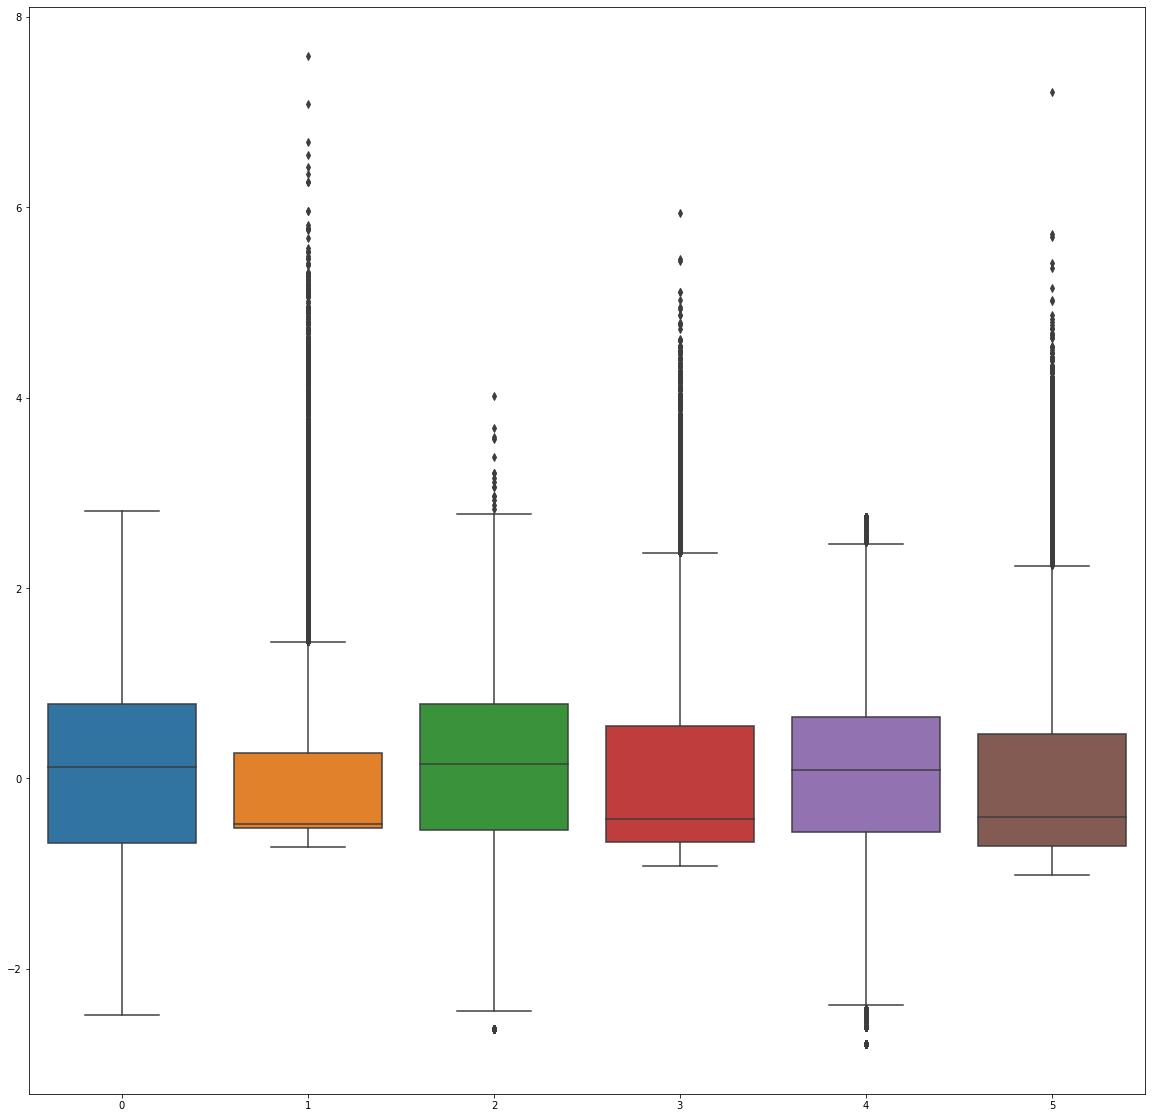

In [107]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=x_scaled,ax=ax)

### Model training and prediction

###  lbfgs solver

In [108]:
logi=LogisticRegression(multi_class="auto",solver="lbfgs",n_jobs=-1,max_iter=150,random_state=2)

In [109]:
logi.fit(x_train,y_train)

LogisticRegression(max_iter=150, n_jobs=-1, random_state=2)

In [110]:
y_pred=logi.predict(x_test)

In [111]:
accuracy_score(y_test,y_pred)

0.6611111111111111

In [112]:
confusion_matrix(y_test,y_pred)

array([[ 153,    1,   10,    0,  102,    2,    0],
       [  23,  348,   38,   51,   45,    0,    8],
       [   1,   15,  925,    1,   82,   16,  407],
       [   0,   46,    3, 1170,   21,  112,    3],
       [  48,   76,   42,  190,  757,  322,    8],
       [   4,    0,   20,  145,  385,  918,    6],
       [   0,   16,  427,    0,    8,    0,  965]], dtype=int64)

### newton-cg solver

In [113]:
logit1=LogisticRegression(solver="newton-cg",multi_class="multinomial",n_jobs=-1,random_state=2,max_iter=150)

In [114]:
logit1.fit(x_train,y_train)

LogisticRegression(max_iter=150, multi_class='multinomial', n_jobs=-1,
                   random_state=2, solver='newton-cg')

In [115]:
y_pred=logit1.predict(x_test)

In [116]:
accuracy_score(y_test,y_pred)

0.6611111111111111

In [117]:
confusion_matrix(y_test,y_pred)

array([[ 153,    1,   10,    0,  102,    2,    0],
       [  23,  348,   38,   51,   45,    0,    8],
       [   1,   15,  925,    1,   82,   16,  407],
       [   0,   46,    3, 1170,   21,  112,    3],
       [  48,   76,   42,  190,  757,  322,    8],
       [   4,    0,   20,  145,  385,  918,    6],
       [   0,   16,  427,    0,    8,    0,  965]], dtype=int64)

### SAG solver

In [118]:
logit2=LogisticRegression(solver="sag",multi_class="auto",n_jobs=-1,random_state=2,max_iter=125)

In [119]:
logit2.fit(x_train,y_train)

LogisticRegression(max_iter=125, n_jobs=-1, random_state=2, solver='sag')

In [120]:
y_pred=logit2.predict(x_test)

In [121]:
accuracy_score(y_test,y_pred)

0.6609848484848485

In [122]:
confusion_matrix(y_test,y_pred)

array([[ 153,    1,   10,    0,  102,    2,    0],
       [  23,  348,   38,   51,   45,    0,    8],
       [   1,   15,  924,    1,   82,   16,  408],
       [   0,   46,    2, 1170,   21,  112,    4],
       [  48,   76,   42,  190,  757,  322,    8],
       [   4,    0,   20,  145,  385,  918,    6],
       [   0,   16,  427,    0,    8,    0,  965]], dtype=int64)

### SAGA solver

In [123]:
logit3=LogisticRegression(solver="saga",multi_class="multinomial",n_jobs=-1,random_state=25,max_iter=125)

In [124]:
logit3.fit(x_train,y_train)

LogisticRegression(max_iter=125, multi_class='multinomial', n_jobs=-1,
                   random_state=25, solver='saga')

In [125]:
y_pred=logit3.predict(x_test)

In [126]:
accuracy_score(y_test,y_pred)

0.6609848484848485

In [127]:
confusion_matrix(y_test,y_pred)

array([[ 153,    1,   10,    0,  102,    2,    0],
       [  23,  348,   38,   51,   45,    0,    8],
       [   1,   15,  924,    1,   83,   15,  408],
       [   0,   46,    2, 1170,   21,  112,    4],
       [  48,   76,   42,  190,  757,  322,    8],
       [   4,    0,   20,  145,  385,  918,    6],
       [   0,   16,  427,    0,    8,    0,  965]], dtype=int64)

### sag solver with class_weight=balanced.

In [128]:
logit4=LogisticRegression(multi_class="auto",solver="sag",n_jobs=-1,max_iter=150,random_state=24,class_weight="balanced")

In [129]:
logit4.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=150, n_jobs=-1,
                   random_state=24, solver='sag')

In [130]:
y_pred=logit4.predict(x_test)

In [131]:
accuracy_score(y_test,y_pred)

0.6392676767676768

### lbgfs solver with class_weight=balanced

In [132]:
logit5=LogisticRegression(multi_class="auto",solver="lbfgs",n_jobs=-1,max_iter=150,random_state=24,class_weight="balanced")

In [133]:
logit5.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=150, n_jobs=-1,
                   random_state=24)

In [134]:
y_pred=logit5.predict(x_test)

In [135]:
accuracy_score(y_test,y_pred)

0.6392676767676768

## Naive bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

In [137]:
gnb=GaussianNB()

In [138]:
gnb.fit(x_train,y_train)

GaussianNB()

In [139]:
y_pred=gnb.predict(x_test)

In [140]:
accuracy_score(y_test,y_pred)

0.6449494949494949

## Knn

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
knn= KNeighborsClassifier()

In [143]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [144]:
y_pred=knn.predict(x_test)

In [145]:
accuracy_score(y_test,y_pred)

0.7396464646464647

In [146]:
knn2= KNeighborsClassifier(n_neighbors=17,p=1,n_jobs=-1,algorithm='kd_tree')

In [147]:
knn2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=17, p=1)

In [148]:
y_pred=knn2.predict(x_test)

In [149]:
accuracy_score(y_test,y_pred)

0.7473484848484848

In [150]:
logit1

LogisticRegression(max_iter=150, multi_class='multinomial', n_jobs=-1,
                   random_state=2, solver='newton-cg')

## Decision tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dt=DecisionTreeClassifier(random_state=42)

In [155]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [156]:
y_pred=dt.predict(x_test)

In [157]:
accuracy_score(y_test,y_pred)

0.726010101010101

In [158]:
dt1=DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='best',min_samples_leaf=10,min_samples_split=10,ccp_alpha=.0001)

In [159]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy',
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [160]:
y_pred=dt1.predict(x_test)

In [161]:
accuracy_score(y_test,y_pred)

0.744570707070707

## Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf=RandomForestClassifier()

In [164]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [165]:
y_pred=rf.predict(x_test)

In [166]:
accuracy_score(y_test,y_pred)

0.782070707070707

In [167]:
rf1=RandomForestClassifier(n_estimators=180,random_state=42,criterion='gini',ccp_alpha=.0001)

In [168]:
rf1.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.0001, n_estimators=180, random_state=42)

In [169]:
y_pred=rf1.predict(x_test)

In [170]:
accuracy_score(y_test,y_pred)

0.785479797979798

## Bagging

In [171]:
from sklearn.ensemble import BaggingClassifier

In [172]:
bg= BaggingClassifier()

In [173]:
bg.fit(x_train,y_train)

BaggingClassifier()

In [174]:
y_pred=bg.predict(x_test)

In [175]:
accuracy_score(y_test,y_pred)

0.768560606060606

## Ada Boosting

In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [177]:
adb= AdaBoostClassifier(learning_rate=.6,random_state=42,algorithm='SAMME.R',n_estimators=70)

In [178]:
adb.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=70, random_state=42)

In [179]:
y_pred=adb.predict(x_test)

In [180]:
accuracy_score(y_test,y_pred)

0.6363636363636364

## Gradient boosting

In [181]:
from sklearn.ensemble import GradientBoostingClassifier

In [182]:
gb=GradientBoostingClassifier(random_state=42,warm_start=True,n_estimators=150,ccp_alpha=.00001)

In [183]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=1e-05, n_estimators=150, random_state=42,
                           warm_start=True)

In [184]:
y_pred=gb.predict(x_test)

In [185]:
accuracy_score(y_test,y_pred)

0.7627525252525252

## Kmeans

In [186]:
from sklearn.cluster import KMeans

In [187]:
km=KMeans(n_clusters=9)

In [188]:
km.fit(x_train,y_train)

KMeans(n_clusters=9)

In [189]:
y_pred=km.predict(x_test)

In [190]:
accuracy_score(y_test,y_pred)

0.18813131313131312

In [191]:
from sklearn.cluster import DBSCAN

In [192]:
dbs=DBSCAN()

In [193]:
dbs.fit(x_train,y_train)

DBSCAN()

In [194]:
y_pred=dbs.fit_predict(x_test)

In [195]:
accuracy_score(y_test,y_pred)

0.02058080808080808

## SVC

In [196]:
from sklearn.svm import LinearSVC

In [197]:
lsvc= LinearSVC(max_iter=5000,random_state=42,C=.62)

In [198]:
lsvc.fit(x_train,y_train)

LinearSVC(C=0.62, max_iter=5000, random_state=42)

In [199]:
y_pred=lsvc.predict(x_test)

In [200]:
accuracy_score(y_test,y_pred)

0.6252525252525253

In [201]:
from sklearn.svm import SVC

In [202]:
svc=SVC()

In [203]:
svc.fit(x_train,y_train)

SVC()

In [204]:
y_pred=svc.predict(x_test)

In [205]:
accuracy_score(y_test,y_pred)

0.7146464646464646

## Pickling

In [151]:
import pickle

In [206]:
pickle.dump(rf1,open('activity_recog_2.pickle','wb'))

In [207]:
pickle.dump(scaler,open('stdtransf.pickle','wb'))